# Boston 주택 가격 예측 모델

**데이터 로드 및 전처리**
***
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.

데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean  # 테스트 데이터도 훈련 데이터의 평균으로 빼야 합니다.
test_data /= std   # 테스트 데이터도 훈련 데이터의 표준편차로 나눠야 합니다.

**모델 구성 및 컴파일**
***
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. 

Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from keras import models
from keras import layers

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력 레이어, 회귀 모델이므로 활성화 함수 없음

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


**모델 학습**
***
epochs와 batch size는 자유롭게 설정해 보세요. 

모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# 모델 학습
history = model.fit(train_data, train_labels, epochs=100, batch_size=1, validation_split=0.2, verbose=2)

Epoch 1/100
323/323 - 2s - loss: 197.8801 - mae: 10.4067 - val_loss: 52.6006 - val_mae: 5.1241
Epoch 2/100
323/323 - 1s - loss: 34.6931 - mae: 3.7163 - val_loss: 31.4344 - val_mae: 3.7311
Epoch 3/100
323/323 - 1s - loss: 24.5397 - mae: 3.1449 - val_loss: 22.6907 - val_mae: 3.3357
Epoch 4/100
323/323 - 1s - loss: 18.9579 - mae: 2.8227 - val_loss: 19.7481 - val_mae: 2.9301
Epoch 5/100
323/323 - 1s - loss: 16.7740 - mae: 2.6829 - val_loss: 20.4993 - val_mae: 2.9744
Epoch 6/100
323/323 - 1s - loss: 15.3167 - mae: 2.5284 - val_loss: 15.1380 - val_mae: 2.7345
Epoch 7/100
323/323 - 1s - loss: 14.0933 - mae: 2.4441 - val_loss: 14.9575 - val_mae: 2.7054
Epoch 8/100
323/323 - 1s - loss: 13.1994 - mae: 2.3908 - val_loss: 14.1674 - val_mae: 2.8187
Epoch 9/100
323/323 - 1s - loss: 12.4965 - mae: 2.2742 - val_loss: 12.6836 - val_mae: 2.6183
Epoch 10/100
323/323 - 1s - loss: 11.7793 - mae: 2.2519 - val_loss: 13.7325 - val_mae: 2.8125
Epoch 11/100
323/323 - 1s - loss: 10.8185 - mae: 2.2222 - val_loss:

323/323 - 1s - loss: 4.0867 - mae: 1.3611 - val_loss: 13.7376 - val_mae: 2.5593
Epoch 90/100
323/323 - 1s - loss: 4.1401 - mae: 1.3499 - val_loss: 12.8498 - val_mae: 2.3950
Epoch 91/100
323/323 - 1s - loss: 4.1254 - mae: 1.3297 - val_loss: 16.9327 - val_mae: 2.5597
Epoch 92/100
323/323 - 1s - loss: 4.0274 - mae: 1.3288 - val_loss: 16.0911 - val_mae: 2.6874
Epoch 93/100
323/323 - 1s - loss: 3.9588 - mae: 1.3312 - val_loss: 13.4441 - val_mae: 2.5518
Epoch 94/100
323/323 - 1s - loss: 4.2382 - mae: 1.3195 - val_loss: 14.8709 - val_mae: 2.3960
Epoch 95/100
323/323 - 1s - loss: 3.9288 - mae: 1.3225 - val_loss: 13.9787 - val_mae: 2.4726
Epoch 96/100
323/323 - 1s - loss: 3.8332 - mae: 1.3153 - val_loss: 12.0147 - val_mae: 2.2756
Epoch 97/100
323/323 - 1s - loss: 4.1162 - mae: 1.3568 - val_loss: 12.4783 - val_mae: 2.3575
Epoch 98/100
323/323 - 1s - loss: 3.8293 - mae: 1.3278 - val_loss: 13.6443 - val_mae: 2.3903
Epoch 99/100
323/323 - 1s - loss: 3.4065 - mae: 1.2200 - val_loss: 19.2439 - val_ma

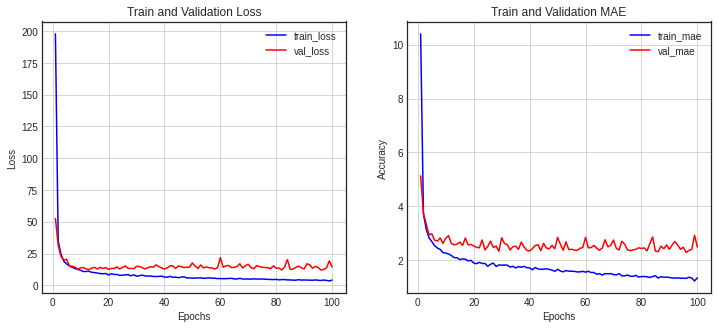

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**
***
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 17.0920 - mae: 2.8405


[17.092042922973633, 2.840503692626953]

# Reuters 딥러닝 모델

**데이터 로드 및 전처리**
***
reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).

데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.

레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

**모델 구성 및 컴파일**
***
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

**모델 학습**
***
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [14]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 1.8930 - accuracy: 0.5711 - val_loss: 1.4031 - val_accuracy: 0.7191
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 1.2811 - accuracy: 0.7093 - val_loss: 1.1608 - val_accuracy: 0.7560
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 1.1167 - accuracy: 0.7461 - val_loss: 1.2252 - val_accuracy: 0.7600
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.9629 - accuracy: 0.7821 - val_loss: 1.1444 - val_accuracy: 0.7858
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.8819 - accuracy: 0.7916 - val_loss: 1.1717 - val_accuracy: 0.7930
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.8048 - accuracy: 0.8061 - val_loss: 1.2028 - val_accuracy: 0.7916
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.7619 - accuracy: 0.8155 - val_loss: 1.2242 - val_accuracy: 0.7890

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

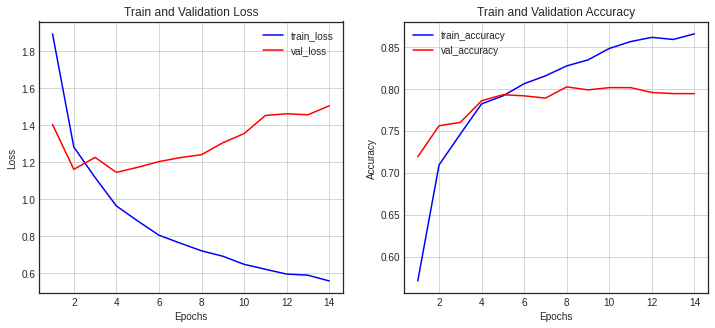

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**
***
테스트 데이터셋을 이용해 모델을 평가합니다.

In [16]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.1558 - accuracy: 0.7649


[1.1557869911193848, 0.764915406703949]

# CIFAR10 딥러닝 모델

**데이터 로드 및 전처리**
***
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.

데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [19]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

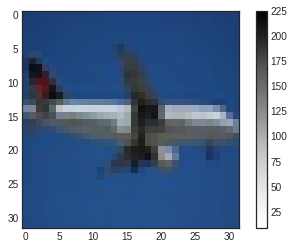

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

**모델 구성 및 컴파일**
***
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)             

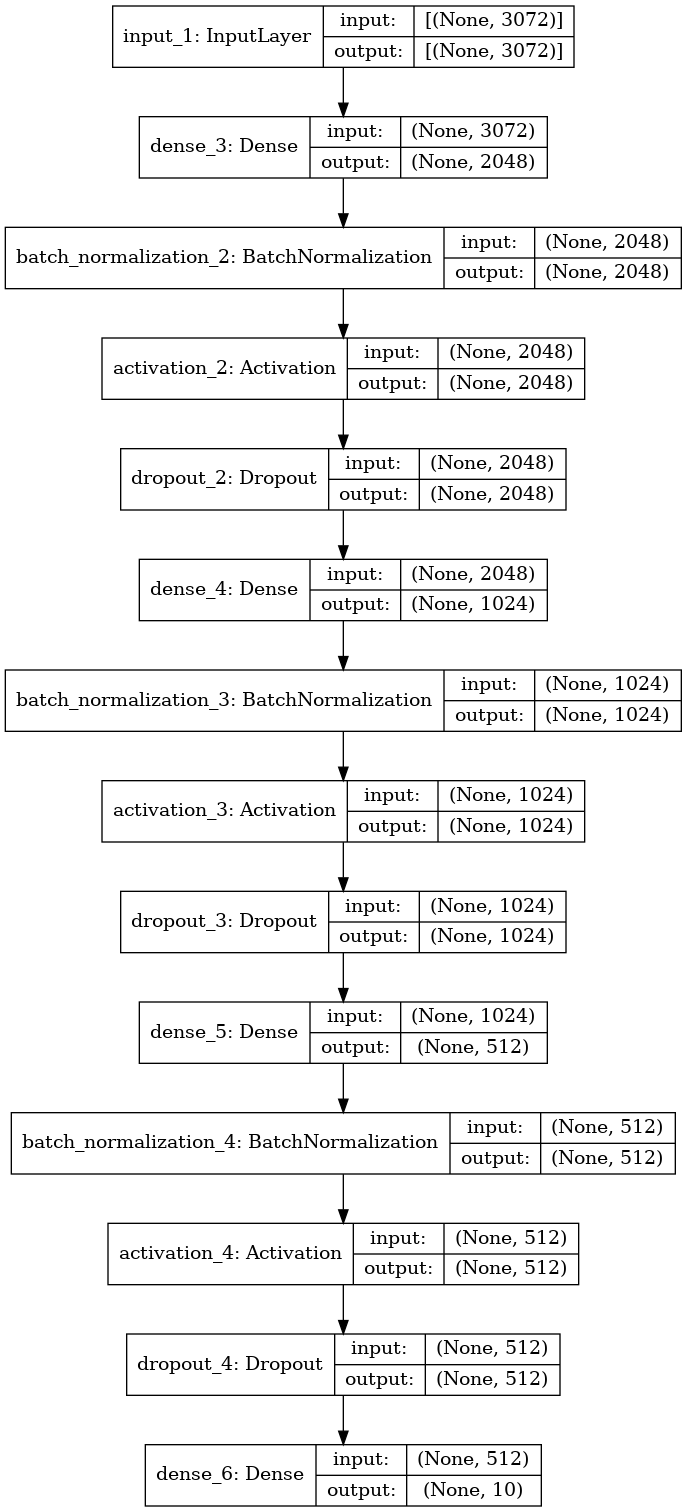

In [26]:
utils.plot_model(model, show_shapes=True)

**모델 학습**
***
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1317 - accuracy: 0.2700 - val_loss: 1.6834 - val_accuracy: 0.3989
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8323 - accuracy: 0.3432 - val_loss: 1.6084 - val_accuracy: 0.4272
Epoch 3/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7419 - accuracy: 0.3691 - val_loss: 1.5717 - val_accuracy: 0.4334
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6879 - accuracy: 0.3906 - val_loss: 1.5333 - val_accuracy: 0.4486
Epoch 5/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6456 - accuracy: 0.4101 - val_loss: 1.5088 - val_accuracy: 0.4637
Epoch 6/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6115 - accuracy: 0.4200 - val_loss: 1.5026 - val_accuracy: 0.4646
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5873 - accuracy: 0.4285 - val_loss: 1.4557 - val_ac

1250/1250 [==============================] - 5s 4ms/step - loss: 1.0571 - accuracy: 0.6201 - val_loss: 1.3380 - val_accuracy: 0.5408
Epoch 58/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0497 - accuracy: 0.6210 - val_loss: 1.2880 - val_accuracy: 0.5600
Epoch 59/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0425 - accuracy: 0.6277 - val_loss: 1.2714 - val_accuracy: 0.5632
Epoch 60/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0434 - accuracy: 0.6251 - val_loss: 1.2800 - val_accuracy: 0.5576
Epoch 61/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0305 - accuracy: 0.6281 - val_loss: 1.2857 - val_accuracy: 0.5550
Epoch 62/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0230 - accuracy: 0.6310 - val_loss: 1.2608 - val_accuracy: 0.5717
Epoch 63/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0133 - accuracy: 0.6385 - val_loss: 1.4320 - val_accuracy

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

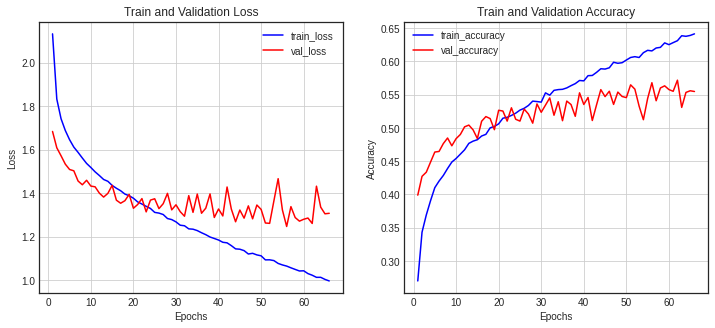

In [28]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_history(history)  

**모델 평가 및 예측**
***
테스트 데이터셋을 이용해 모델을 평가합니다.

In [29]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2407 - accuracy: 0.5654


[1.2406567335128784, 0.5654000043869019]